<a href="https://colab.research.google.com/github/alexandertaoadams/AlexanderAdamsMastersThesis/blob/main/Complexity_Length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gpjax

In [ ]:
import jax
import gpjax
import jax.numpy as jnp
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!git clone https://github.com/alexandertaoadams/AlexanderAdamsMastersThesis.git

import sys
sys.path.insert(0, '/content/AlexanderAdamsMastersThesis')
import AlexanderAdamsMastersThesis.src as src

from src.algorithms import Gram_XX_jit

## **Timing Test**

In [ ]:
# Approximation of 1 second long Brownian Motion
def brownian_motion(number, dimensions, length):
    shape = (number, dimensions, length)
    key = jax.random.PRNGKey(0)
    gaussian_matrix = jax.random.normal(key, shape) / jnp.sqrt(length)
    brownian_matrix = jnp.cumsum(gaussian_matrix, axis=2)
    return jnp.array(brownian_matrix)

In [ ]:
n_nontrivial_levels = 3
n_X = 10
n_dimensions= 10
n_timesteps=np.linspace(1,200,100).astype(int)

In [ ]:
number_trials = 10
ones_D = jnp.ones(n_dimensions)
ones_lev = jnp.ones(n_nontrivial_levels+1)

# Compile
for L in n_timesteps:
    bm = brownian_motion(n_X, n_dimensions, L)
    _ = Gram_XX_jit(bm, n_X, L.item(), n_nontrivial_levels, ones_D, 1.0, ones_lev)

# Run
times_array = []
for L in n_timesteps:
    trial_times = []

    for _ in range(number_trials):
        bm = brownian_motion(n_X, n_dimensions, L)

        t0 = time.perf_counter()
        _ = Gram_XX_jit(bm, n_X, L.item(), n_nontrivial_levels, ones_D, 1.0, ones_lev)
        t1 = time.perf_counter()

        trial_times.append(t1-t0)

    median = jnp.median(jnp.array(trial_times))
    times_array.append(median)

times_array = jnp.array(times_array)

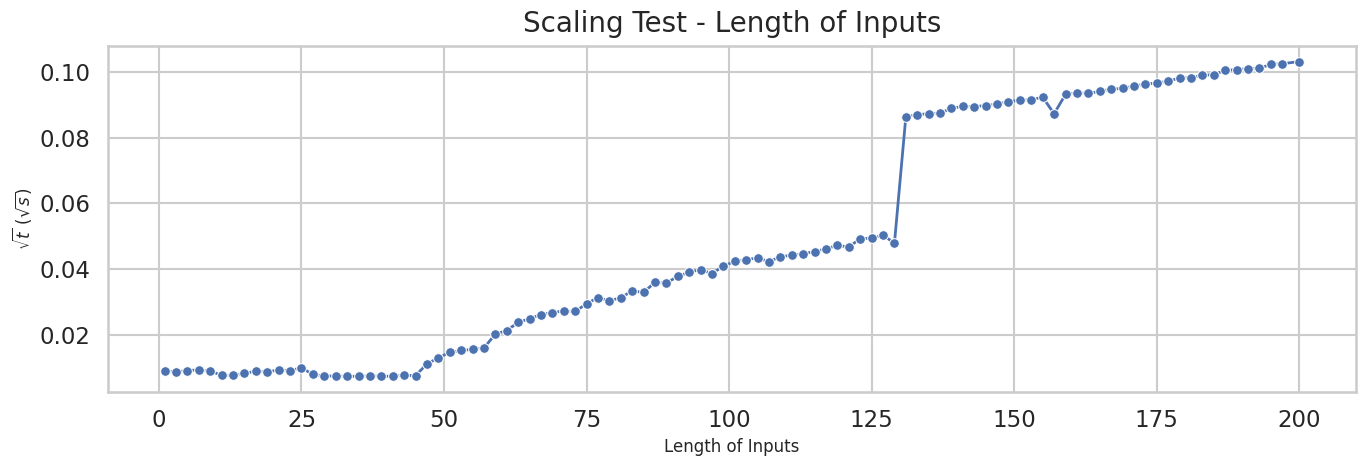

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

y = np.sqrt(np.array(times_array))

plt.figure(figsize=(14, 5))
sns.lineplot(
    x=n_timesteps,
    y=y,
    marker="o",
    linewidth=2,
    markersize=7
)

plt.title("Scaling Test - Length of Inputs", pad=10, fontsize=20)
plt.xlabel("Length of Inputs", fontsize=12)
plt.ylabel(r"$\sqrt{t}$ ($\sqrt{s}$)", fontsize=12)

plt.tight_layout()
plt.show()